In [80]:
# import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [81]:
# load the dataset
data = pd.read_csv(r"649.csv")

In [82]:
data

PRODUCT  DRAW NUMBER  SEQUENCE NUMBER  DRAW DATE  NUMBER DRAWN 1  \
0         649            1                0  6/12/1982               3   
1         649            2                0  6/19/1982               8   
2         649            3                0  6/26/1982               1   
3         649            4                0   7/3/1982               3   
4         649            5                0  7/10/1982               5   
...       ...          ...              ...        ...             ...   
3660      649         3587                0   6/6/2018              10   
3661      649         3588                0   6/9/2018              19   
3662      649         3589                0  6/13/2018               6   
3663      649         3590                0  6/16/2018               2   
3664      649         3591                0  6/20/2018              14   

      NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  NUMBER DRAWN 5  \
0                 11              12              14              41   
1                 33              36              37              39   
2                  6              23              24              27   
3                  9              10              13              20   
4                 14              21              31              34   
...              ...             ...             ...             ...   
3660              15              23              38              40   
3661              25              31              36              46   
3662              22              24              31              32   
3663              15              21              31              38   
3664              24              31              35              37   

      NUMBER DRAWN 6  BONUS NUMBER  
0                 43            13  
1                 41             9  
2                 39            34  
3                 43            34  
4                 47            45  
...              ...           ...  
3660              41            35  
3661              47            26  
3662              34            16  
3663              49             8  
3664              48            17  

[3665 rows x 11 columns]

In [83]:
data.corr()

PRODUCT  DRAW NUMBER  SEQUENCE NUMBER  NUMBER DRAWN 1  \
PRODUCT              NaN          NaN              NaN             NaN   
DRAW NUMBER          NaN     1.00e+00         1.42e-01        8.55e-03   
SEQUENCE NUMBER      NaN     1.42e-01         1.00e+00        2.78e-02   
NUMBER DRAWN 1       NaN     8.55e-03         2.78e-02        1.00e+00   
NUMBER DRAWN 2       NaN    -2.92e-03         3.75e-02        6.42e-01   
NUMBER DRAWN 3       NaN     2.31e-03         1.75e-02        4.57e-01   
NUMBER DRAWN 4       NaN    -1.07e-02         2.02e-02        3.44e-01   
NUMBER DRAWN 5       NaN    -2.74e-03         2.10e-02        2.53e-01   
NUMBER DRAWN 6       NaN    -7.90e-03         9.33e-03        1.45e-01   
BONUS NUMBER         NaN    -6.50e-02        -2.22e-01       -4.32e-02   

                 NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  \
PRODUCT                     NaN             NaN             NaN   
DRAW NUMBER           -2.92e-03        2.31e-03           -0.01   
SEQUENCE NUMBER        3.75e-02        1.75e-02            0.02   
NUMBER DRAWN 1         6.42e-01        4.57e-01            0.34   
NUMBER DRAWN 2         1.00e+00        7.26e-01            0.55   
NUMBER DRAWN 3         7.26e-01        1.00e+00            0.76   
NUMBER DRAWN 4         5.46e-01        7.55e-01            1.00   
NUMBER DRAWN 5         3.98e-01        5.53e-01            0.72   
NUMBER DRAWN 6         2.49e-01        3.59e-01            0.46   
BONUS NUMBER          -4.05e-02       -2.37e-02           -0.02   

                 NUMBER DRAWN 5  NUMBER DRAWN 6  BONUS NUMBER  
PRODUCT                     NaN             NaN           NaN  
DRAW NUMBER           -2.74e-03       -7.90e-03     -6.50e-02  
SEQUENCE NUMBER        2.10e-02        9.33e-03     -2.22e-01  
NUMBER DRAWN 1         2.53e-01        1.45e-01     -4.32e-02  
NUMBER DRAWN 2         3.98e-01        2.49e-01     -4.05e-02  
NUMBER DRAWN 3         5.53e-01        3.59e-01     -2.37e-02  
NUMBER DRAWN 4         7.19e-01        4.61e-01     -2.41e-02  
NUMBER DRAWN 5         1.00e+00        6.31e-01     -1.27e-02  
NUMBER DRAWN 6         6.31e-01        1.00e+00     -3.37e-03  
BONUS NUMBER          -1.27e-02       -3.37e-03      1.00e+00

## 2: Data cleaning, exploratory data analysis, and feature engineering

#Descriptive statistics

In [84]:
# shape
data.shape

(3665, 11)

In [85]:
# present the datatype of the variables and other basic information
# the numbers beside each variable is the count of non-missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 11 columns):
PRODUCT            3665 non-null int64
DRAW NUMBER        3665 non-null int64
SEQUENCE NUMBER    3665 non-null int64
DRAW DATE          3665 non-null object
NUMBER DRAWN 1     3665 non-null int64
NUMBER DRAWN 2     3665 non-null int64
NUMBER DRAWN 3     3665 non-null int64
NUMBER DRAWN 4     3665 non-null int64
NUMBER DRAWN 5     3665 non-null int64
NUMBER DRAWN 6     3665 non-null int64
BONUS NUMBER       3665 non-null int64
dtypes: int64(10), object(1)
memory usage: 315.1+ KB


In [86]:
# check for variables (i.e. columns) that have missing values
data.isnull().any()

PRODUCT            False
DRAW NUMBER        False
SEQUENCE NUMBER    False
DRAW DATE          False
NUMBER DRAWN 1     False
NUMBER DRAWN 2     False
NUMBER DRAWN 3     False
NUMBER DRAWN 4     False
NUMBER DRAWN 5     False
NUMBER DRAWN 6     False
BONUS NUMBER       False
dtype: bool

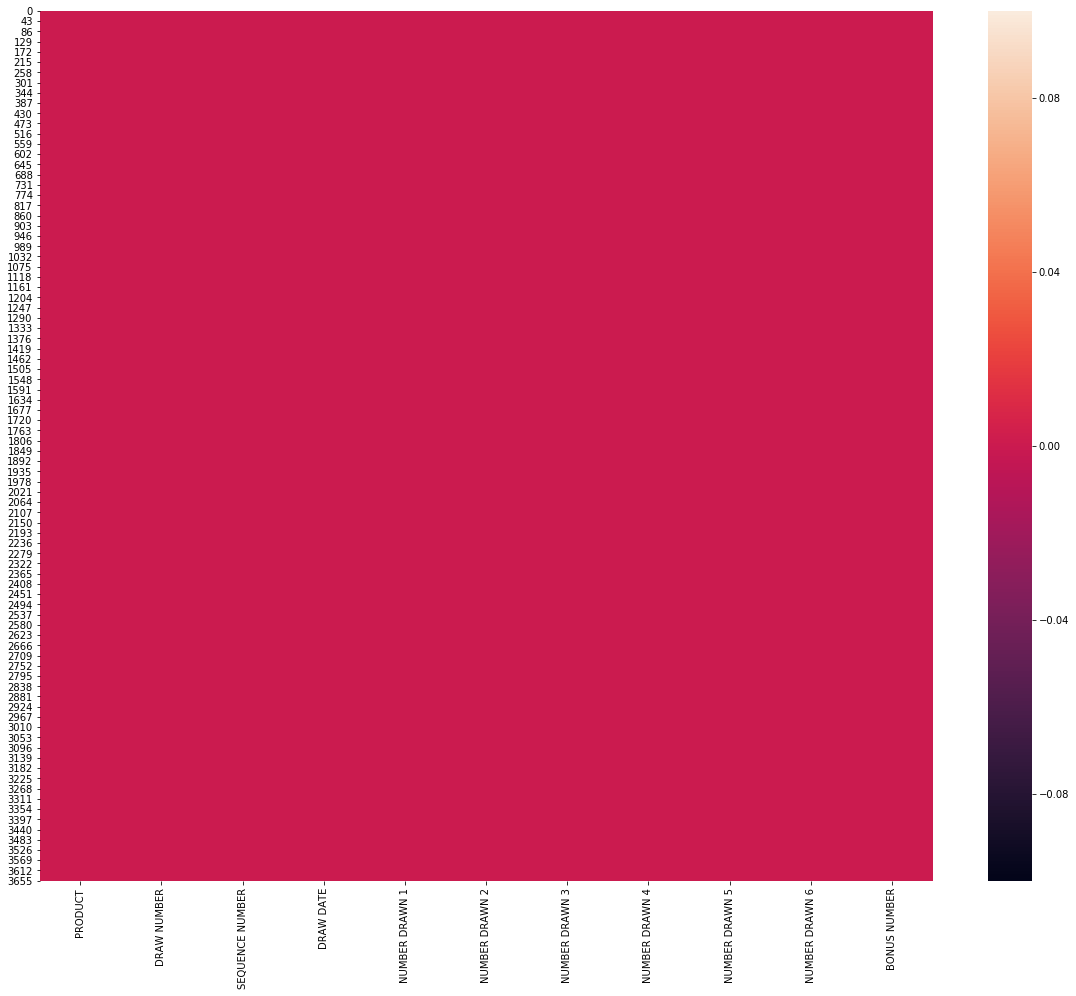

In [87]:
# visualize the patterns of missing values using seaborn heatmaps
plt.figure(figsize=(20, 16))
sns.heatmap(data.isnull())
plt.show()

In [88]:
# get the percentage of missing values
data_missing = data.isna()

In [89]:
percentage_missing = (data_missing.sum() / len(data)).round(4) * 100

In [90]:
percentage_missing.where(percentage_missing > 0)

PRODUCT           NaN
DRAW NUMBER       NaN
SEQUENCE NUMBER   NaN
DRAW DATE         NaN
NUMBER DRAWN 1    NaN
NUMBER DRAWN 2    NaN
NUMBER DRAWN 3    NaN
NUMBER DRAWN 4    NaN
NUMBER DRAWN 5    NaN
NUMBER DRAWN 6    NaN
BONUS NUMBER      NaN
dtype: float64

In [91]:
# we will deal with missing values by removing rows that are missing from the dataset
data_reduced = data.dropna()

In [92]:
# check new data dimensions after removing missing data
print('new dimensions:', data_reduced.shape)
print('old dimensions:', data.shape)

new dimensions: (3665, 11)
old dimensions: (3665, 11)


In [93]:
# check if the dataset that removed rows with missing values actually contains no missing values
data_reduced.isnull().any()

PRODUCT            False
DRAW NUMBER        False
SEQUENCE NUMBER    False
DRAW DATE          False
NUMBER DRAWN 1     False
NUMBER DRAWN 2     False
NUMBER DRAWN 3     False
NUMBER DRAWN 4     False
NUMBER DRAWN 5     False
NUMBER DRAWN 6     False
BONUS NUMBER       False
dtype: bool

## Handling Outliers

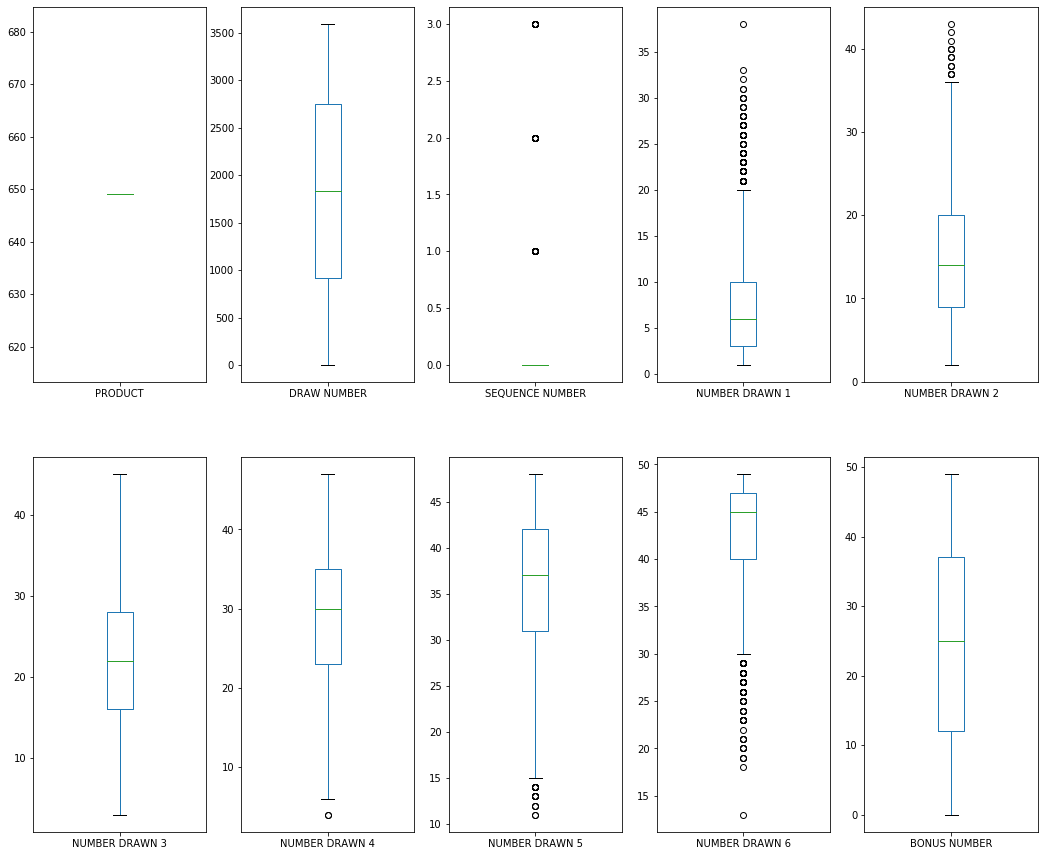

In [94]:
# visualize outliers using box and whisker plots
data_reduced.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(18, 40))
plt.show()

In [95]:
data_no_outliers = data_reduced.drop(data_reduced.index[~constraints])

In [96]:
# get shape of dataset with outliers removed
data_no_outliers.shape

(0, 11)

In [97]:
data_no_outliers.columns

Index(['PRODUCT', 'DRAW NUMBER', 'SEQUENCE NUMBER', 'DRAW DATE',
       'NUMBER DRAWN 1', 'NUMBER DRAWN 2', 'NUMBER DRAWN 3', 'NUMBER DRAWN 4',
       'NUMBER DRAWN 5', 'NUMBER DRAWN 6', 'BONUS NUMBER'],
      dtype='object')

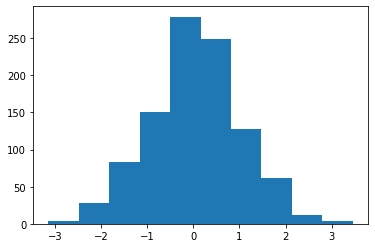

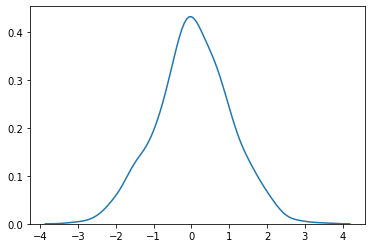

In [98]:
# create 1000 data points from the normal distributions
data = np.random.randn(1000)
# create a histogram plot
plt.hist(data)
plt.show()
# crate a density plot using seaborn
my_fig = sns.distplot(data, hist=False)
plt.show()


In [99]:
# We load the MNIST dataset below
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [100]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


In [102]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

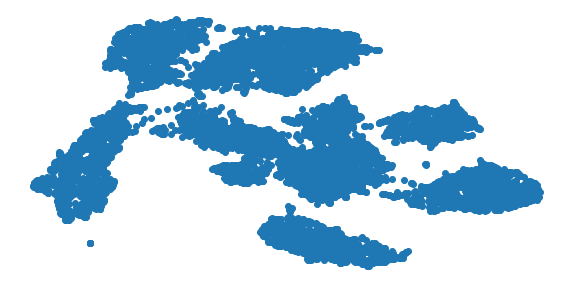

In [103]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# conclusion
UMAP (Uniform Manifold Approximation and Projection) is a novel manifold learning technique for dimension reduction. UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology. The result is a practical scalable algorithm that applies to real world data.
From the data can see the assign and the density of the lottery.